### The Sparks Foundation #GRIPJULY2021
### TASK #6 :- Prediction using Decision Tree Algorithm
### By Amit Hiremath

### Import the libraries

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [60]:
#import data from the local host
df=pd.read_csv(r'C:\Users\Admin\Desktop\Spark-Fondation\Iris.csv')

In [61]:
# First five observations of the data set
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### No NULL values and empty cells hence the given data is clean and ready for the training

In [63]:
df.shape

(150, 6)

In [64]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [65]:
df=df.drop('Id',axis=1)

In [66]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Data Visualization:
### Our target column is the species column because, in the end, we want to predict the correct species of flower.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


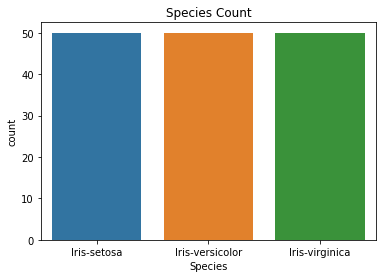

In [67]:
plt.title('Species Count')
sns.countplot(df['Species']);

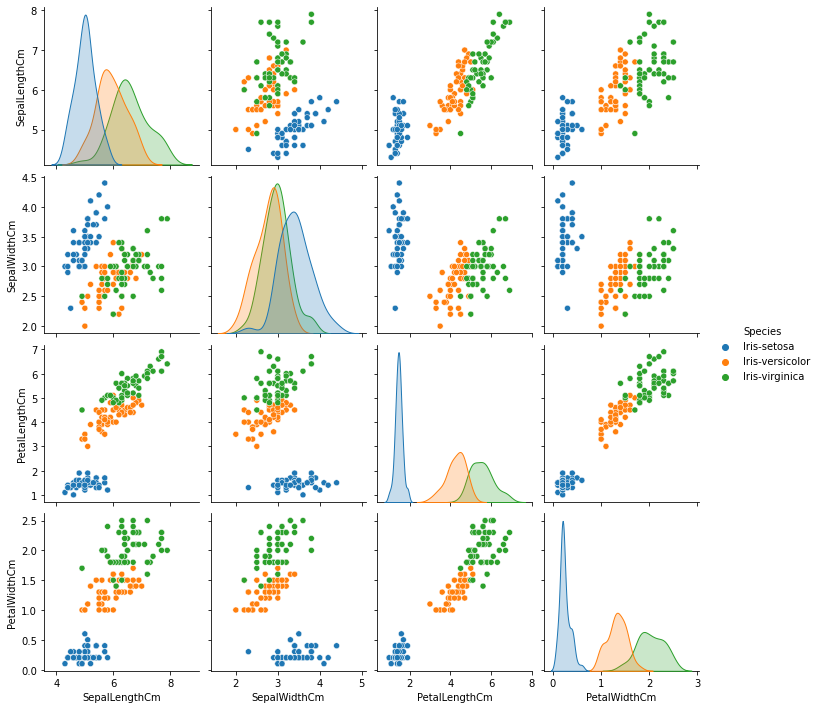

In [68]:

sns.pairplot(df, hue='Species')

## Data preprocessing

In [69]:
X=df.iloc[:,0:4].values
lc=LabelEncoder()
df['Species']=lc.fit_transform(df['Species'])
y=df['Species'].values


## Model Training:

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [97]:
dtree=DecisionTreeClassifier()
dclassifier=dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [98]:
y_pred=dclassifier.predict(X_test)
y_pred

array([0, 2, 0, 0, 2, 1, 2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 2, 1, 0,
       0, 2, 1, 2, 0, 2, 2, 1, 1, 1, 0, 2, 0, 1, 1, 2])

### Evaluating Model

In [99]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9210526315789473


## Classification Report and Confusion Matrix

In [100]:
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.77      0.87        13
           2       0.80      1.00      0.89        12

    accuracy                           0.92        38
   macro avg       0.93      0.92      0.92        38
weighted avg       0.94      0.92      0.92        38



## Visualize the trained model:

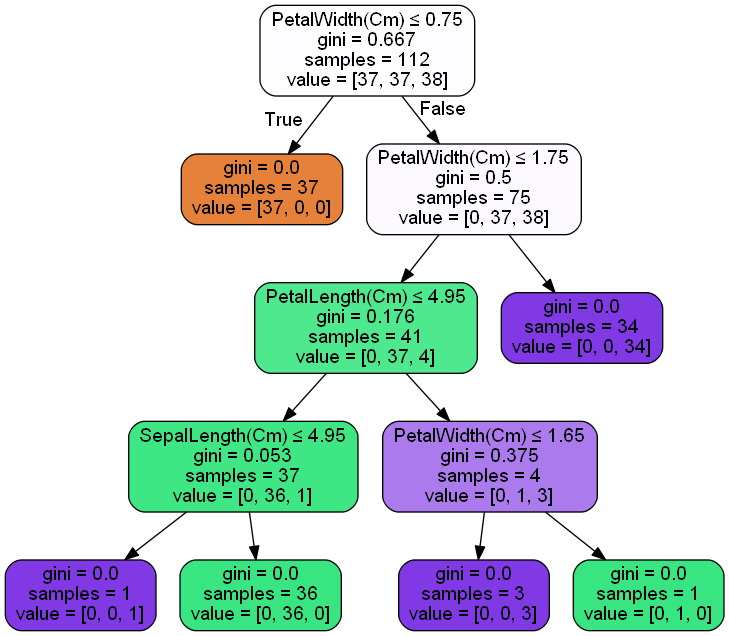

In [101]:
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

feature_cols=['SepalLength(Cm)','SepalWidth(Cm)','PetalLength(Cm)','PetalWidth(Cm)']

# Visualize the graph
dot_data = StringIO()
export_graphviz(dclassifier, out_file=dot_data, feature_names=feature_cols,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Conclusion:

### Trained model is giving the accuracy score of 92%